In [1]:
using DataFrames
using CSV
using Statistics
using PyPlot
rc("axes.spines", top = false, right = false)

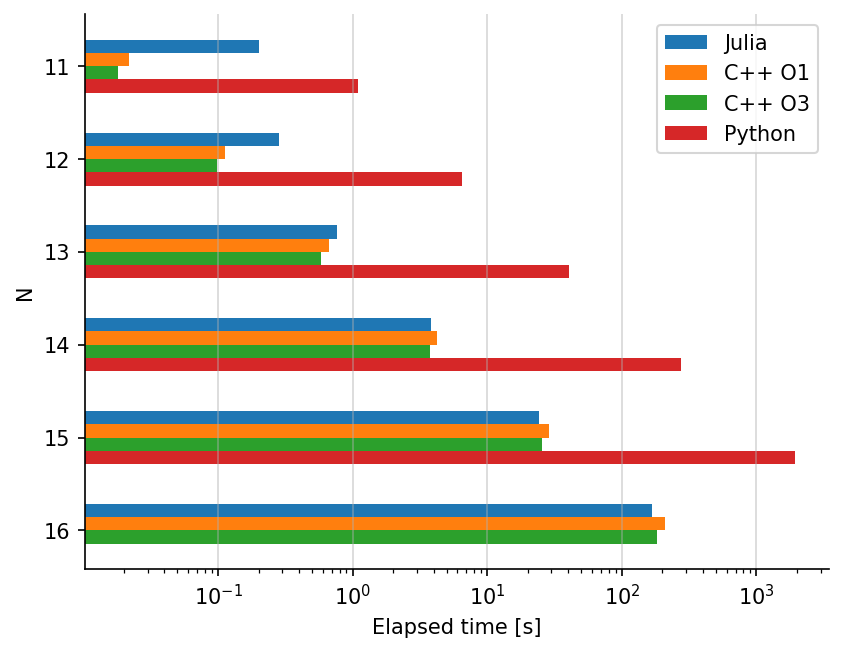

In [2]:
data = DataFrame(CSV.File("benchmark.txt", delim = '\t'))

fig, ax = subplots(dpi = 150)
for (i, exe) in enumerate(["./nqueens.jl", "./nqueens-cpp-O1", "./nqueens-cpp-O3", "./nqueens.py"])
    if exe == "./nqueens.jl"
        label = "Julia"
    elseif exe == "./nqueens.py"
        label = "Python"
    elseif exe == "./nqueens-cpp-O1"
        label = "C++ O1"
    else
        label = "C++ O3"
    end
    sub = data[data.exe .== exe,:]
    height = 1/7
    ax.barh((@. sub.size + i * height - 5height/2), sub.elapsed; height, label)
end
ax.legend()
ax.grid(alpha = 1/2, axis = "x")
ax.set(xlabel = "Elapsed time [s]", ylabel = "N", xscale = "log")
ax.invert_yaxis()
fig.savefig("nqueens.pdf", bbox_inches = "tight")

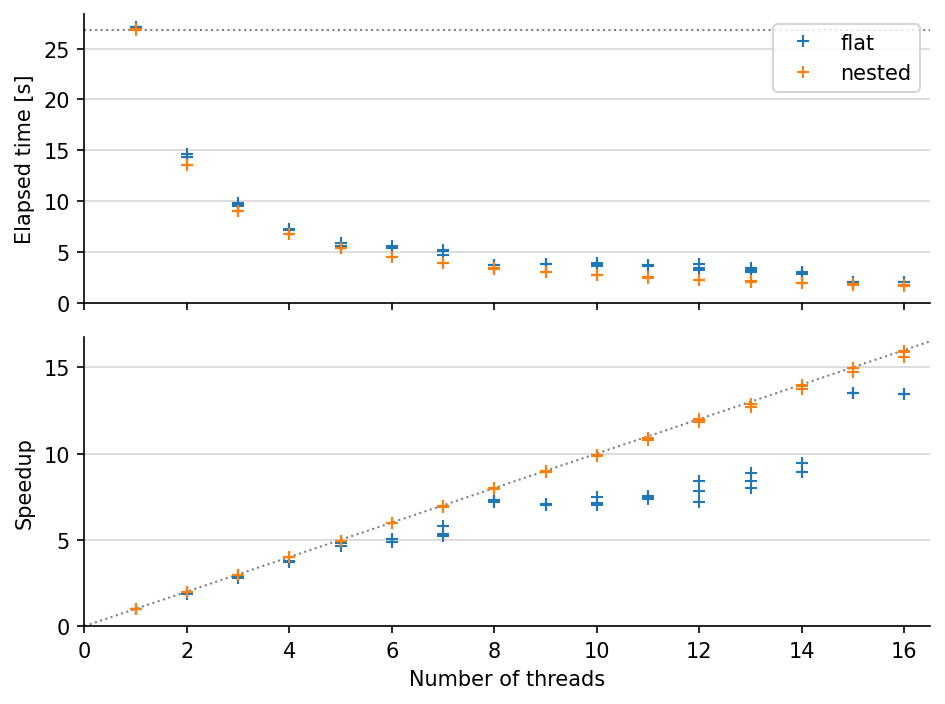

In [3]:
data = DataFrame(CSV.File("benchmark-mt.txt", delim = '\t'))

fig, (ax1, ax2) = subplots(2, 1, dpi = 150, sharex = true)
serial = data[data.name .== "serial",:]
base = median(serial.elapsed)
ax1.axhline(base, ls = "dotted", color = "gray", lw = 1)
ax2.axline((0, 0), slope = 1, ls = "dotted", color = "gray", lw = 1)
for name in ["flat", "nested"]
    base = median(data[(data.name .== name) .& (data.nthreads .== 1),:elapsed])
    sub = data[data.name .== name,:]
    ax1.plot(sub.nthreads, sub.elapsed, "+", label = name)
    ax2.plot(sub.nthreads, sub.elapsed .\ base, "+", label = name)
end
ax1.legend(loc = "upper right")
ax1.grid(axis = "y", alpha = 1/2)
ax2.grid(axis = "y", alpha = 1/2)
ax1.set(ylabel = "Elapsed time [s]", ylim = (0, nothing), xlim = (0, 16.5))
ax2.set(ylabel = "Speedup", xlabel = "Number of threads", ylim = (0, nothing))
fig.tight_layout()
fig.savefig("nqueens-mt.pdf", bbox_inches = "tight")